# CodSoft Task 1 (Movie Genre Classification)                                                                                                          

### To develop a machine learning model capable of predicting the genre of a movie utilizing its plot summary or associated textual data. This endeavor will explore text processing techniques, including TF-IDF and evaluate the performance of various methods, namely Naive Bayes and Support Vector Machines.

Step 1: Extracting and filtering the data

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("C://Users//91990//OneDrive//Documents//Genre Classification Dataset//train_data.txt", delimiter='\t', header=None, names=['Genre', 'Plot'])
test_data = pd.read_csv("C://Users//91990//OneDrive//Documents//Genre Classification Dataset//train_data.txt", delimiter='\t', header=None, names=['Genre', 'Plot'])

In [3]:
train_data.head()

,Genre,Plot
0,1 ::: Oscar et la dame rose (2009) ::: drama :...,NaN
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...,NaN
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",NaN
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...,NaN
4,5 ::: The Unrecovered (2007) ::: drama ::: The...,NaN


In [4]:
# Split the 'Genre' column based on the delimiters
train_data[['ID', 'Title_Year', 'Genre', 'Plot']] = train_data['Genre'].str.split(':::', expand=True)
# Extract the year from the 'Title_Year' column and create a separate 'Year' column
train_data['Year'] = train_data['Title_Year'].str.extract(r'\((\d{4})\)')
# Remove the year from the 'Title_Year' column to keep only the title
train_data['Title'] = train_data['Title_Year'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
# Drop the original 'Genre' and 'Title_Year' columns as they are no longer needed
train_data.drop(columns=['Title_Year'], inplace=True)
# Rearrange the columns for better readability
train_data = train_data[['ID', 'Title', 'Year', 'Genre', 'Plot']]
# Display the cleaned training data
train_data.head()

,ID,Title,Year,Genre,Plot
0,1,Oscar et la dame rose,2009,drama,Listening in to a conversation between his do...
1,2,Cupid,1997,thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful",1980,adult,As the bus empties the students for their fie...
3,4,The Secret Sin,1915,drama,To help their unemployed father make ends mee...
4,5,The Unrecovered,2007,drama,The film's title refers not only to the un-re...


In [5]:
# Display more rows of the original test data to further understand its structure
test_data.sample(20)

,Genre,Plot
5339,5340 ::: A Hollywood Scrapbook (2009) ::: docu...,NaN
15355,"15356 ::: ""Coda"" (2017) ::: comedy ::: CODA is...",NaN
981,"982 ::: ""BlazBlue: Alter Memory"" (2013) ::: an...",NaN
17825,17826 ::: The Tenant (2008/I) ::: drama ::: Ob...,NaN
7280,"7281 ::: ""Clover"" (2017) ::: horror ::: The se...",NaN
23997,23998 ::: American ESPionage (2017) ::: docume...,NaN
32110,32111 ::: Ariyah & Tristan's Inevitable Break-...,NaN
14419,14420 ::: One Night in CLE (2018) ::: comedy :...,NaN
48828,48829 ::: The Storm (????/II) ::: action ::: I...,NaN
12568,12569 ::: In a Steel Box (2005) ::: short ::: ...,NaN


In [6]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()
missing_values

ID          0
Title       0
Year     4347
Genre       0
Plot        0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the training data into training and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Genre'])

train_df.shape, val_df.shape

((43371, 5), (10843, 5))

Step 2:Extraction through TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the plots of the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Plot'])

# Transform the plots of the validation data
X_val_tfidf = tfidf_vectorizer.transform(val_df['Plot'])

# Extract the genre labels for training and validation
y_train = train_df['Genre']
y_val = val_df['Genre']

X_train_tfidf.shape, X_val_tfidf.shape

((43371, 5000), (10843, 5000))

Step 3: Visualization through graphical representation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


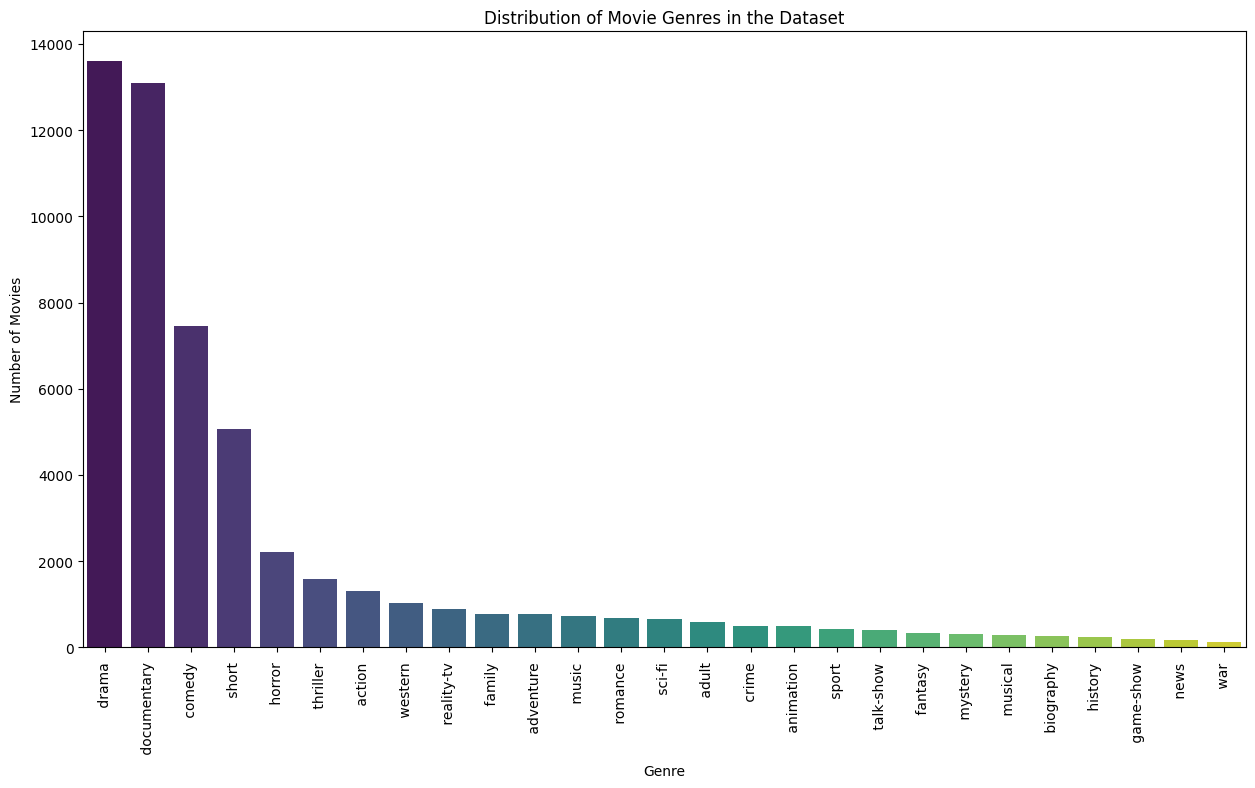

In [10]:
# Visualization for the distribution of movie genres

plt.figure(figsize=(15, 8))
genre_counts = train_data['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

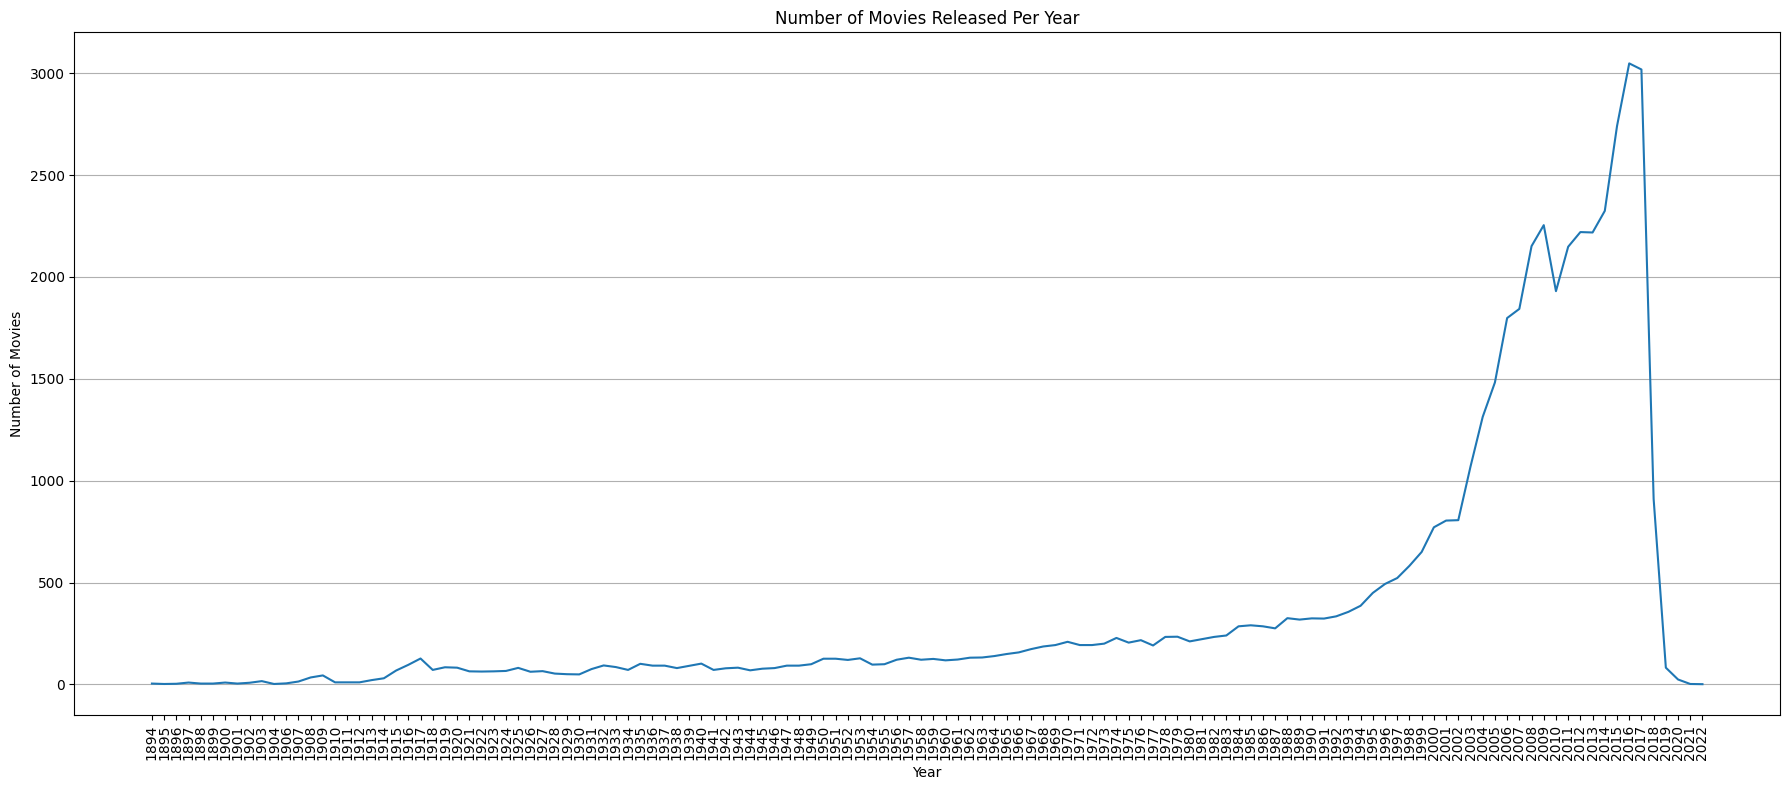

In [11]:
# Visualizing the number of movies released per year
plt.figure(figsize=(18, 8))
year_counts = train_data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

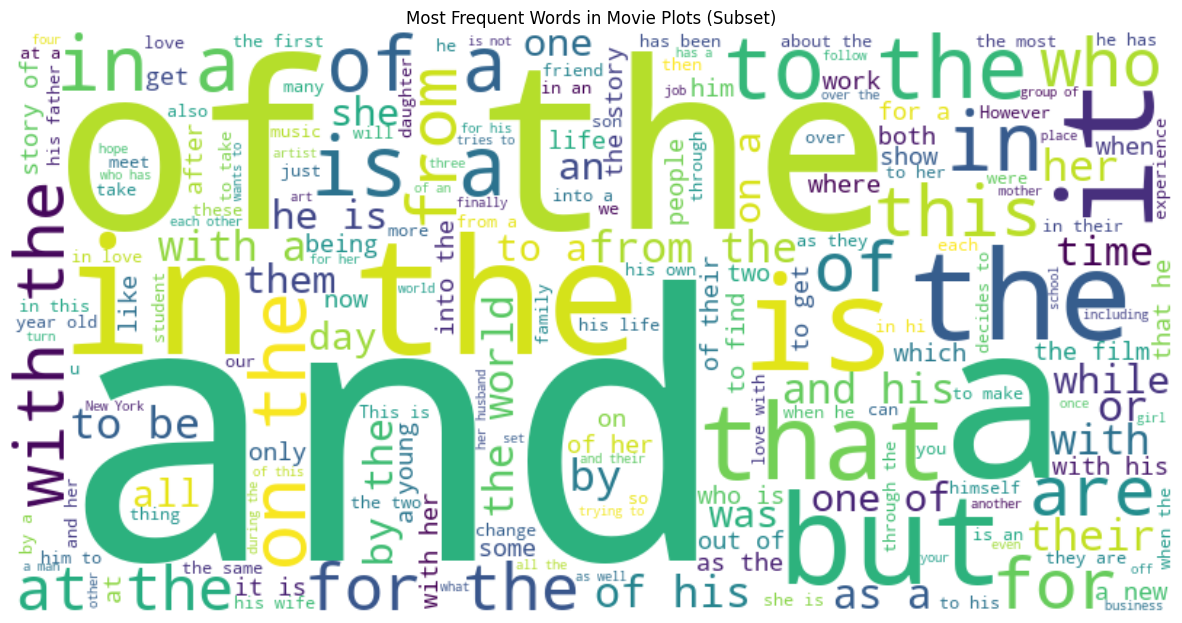

In [12]:
# Necessary imports for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Taking a subset of the data for the word cloud
subset_plots = ' '.join(train_data['Plot'].sample(5000))

# Create a word cloud for the subset of movie plots
wordcloud_subset = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(subset_plots)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_subset, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Movie Plots (Subset)')
plt.show()

Step 4:Using machine learning method through Naive Bayes

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Taking a subset of 1000 movies from the original dataset
subset_df = train_data.sample(1000, random_state=42)

In [15]:
# Selecting the top 3 most common genres in the subset
top_3_genres = subset_df['Genre'].value_counts().head(3).index

In [16]:
# Filtering the subset to only include movies from these top 3 genres
filtered_subset_df = subset_df[subset_df['Genre'].isin(top_3_genres)]
filtered_train_df, filtered_val_df = train_test_split(filtered_subset_df, test_size=0.2, random_state=42, stratify=filtered_subset_df['Genre'])


In [17]:
# Vectorizing the filtered data using TF-IDF
X_train_filtered_subset = tfidf_vectorizer.transform(filtered_train_df['Plot'])
y_train_filtered_subset = filtered_train_df['Genre']
X_val_filtered_subset = tfidf_vectorizer.transform(filtered_val_df['Plot'])
y_val_filtered_subset = filtered_val_df['Genre']

In [18]:
# Training and predictions
# Multinomial Naive Bayes
nb_classifier_filtered_subset = MultinomialNB()
nb_classifier_filtered_subset.fit(X_train_filtered_subset, y_train_filtered_subset)
y_pred_nb_filtered_subset = nb_classifier_filtered_subset.predict(X_val_filtered_subset)


In [19]:
# SVM
svm_classifier_filtered_subset = LinearSVC(max_iter=10000)
svm_classifier_filtered_subset.fit(X_train_filtered_subset, y_train_filtered_subset)
y_pred_svm_filtered_subset = svm_classifier_filtered_subset.predict(X_val_filtered_subset)

C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [20]:
# Evaluations
conf_matrix_nb_filtered_subset = confusion_matrix(y_val_filtered_subset, y_pred_nb_filtered_subset, labels=top_3_genres)
report_nb_filtered_subset = classification_report(y_val_filtered_subset, y_pred_nb_filtered_subset, target_names=top_3_genres)
accuracy_nb_filtered_subset = accuracy_score(y_val_filtered_subset, y_pred_nb_filtered_subset)


In [21]:
conf_matrix_svm_filtered_subset = confusion_matrix(y_val_filtered_subset, y_pred_svm_filtered_subset, labels=top_3_genres)
report_svm_filtered_subset = classification_report(y_val_filtered_subset, y_pred_svm_filtered_subset, target_names=top_3_genres)
accuracy_svm_filtered_subset = accuracy_score(y_val_filtered_subset, y_pred_svm_filtered_subset)

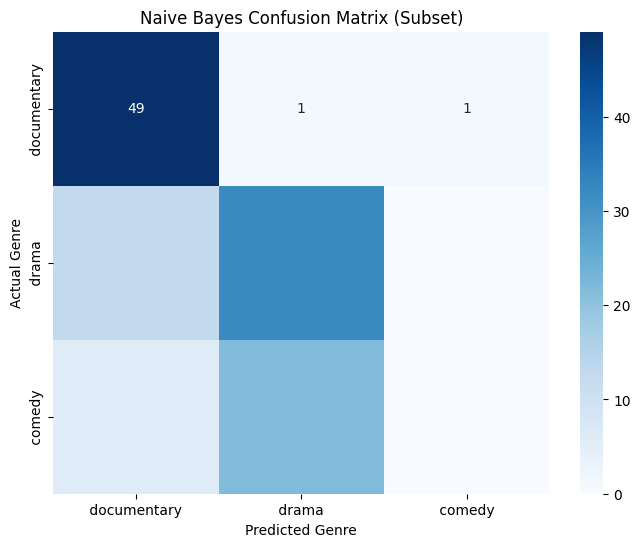

In [22]:
# Displaying the confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_filtered_subset, annot=True, fmt='d', cmap="Blues", xticklabels=top_3_genres, yticklabels=top_3_genres)
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.title('Naive Bayes Confusion Matrix (Subset)')
plt.show()

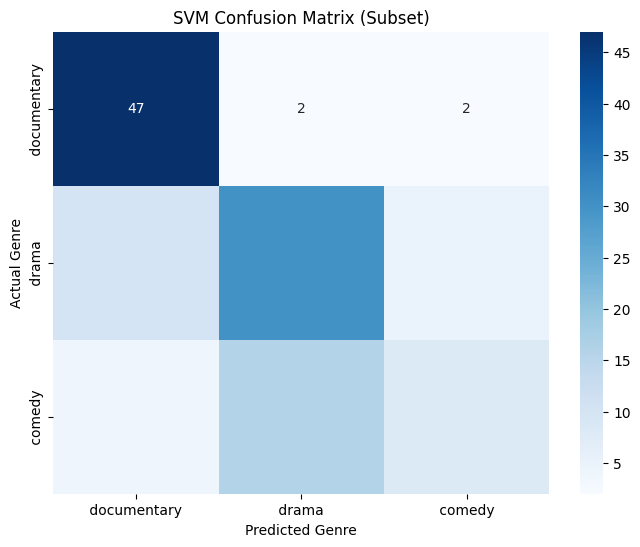

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_filtered_subset, annot=True, fmt='d', cmap="Blues", xticklabels=top_3_genres, yticklabels=top_3_genres)
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.title('SVM Confusion Matrix (Subset)')
plt.show()

In [24]:
report_nb_filtered_subset, accuracy_nb_filtered_subset, report_svm_filtered_subset, accuracy_svm_filtered_subset

('               precision    recall  f1-score   support\n\n documentary        0.00      0.00      0.00        28\n       drama        0.72      0.96      0.82        51\n      comedy        0.58      0.71      0.64        45\n\n     accuracy                           0.65       124\n    macro avg       0.43      0.56      0.49       124\n weighted avg       0.51      0.65      0.57       124\n',
 0.6532258064516129,
 '               precision    recall  f1-score   support\n\n documentary        0.53      0.29      0.37        28\n       drama        0.77      0.92      0.84        51\n      comedy        0.62      0.67      0.65        45\n\n     accuracy                           0.69       124\n    macro avg       0.64      0.62      0.62       124\n weighted avg       0.66      0.69      0.66       124\n',
 0.6854838709677419)

Step 5: Prediction

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the validation set
y_val_pred = nb_classifier.predict(X_val_tfidf)

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score

In [34]:
import numpy as np

# Select a random year from the dataset
random_year = np.random.choice(train_data['Year'].dropna().unique())

# Filter the dataset for movies from the selected year
movies_from_year = train_data[train_data['Year'] == random_year]

# For each movie, predict the genre and get the probability of the predicted genre
predicted_probs = nb_classifier.predict_proba(tfidf_vectorizer.transform(movies_from_year['Plot']))
predicted_genres = nb_classifier.classes_[np.argmax(predicted_probs, axis=1)]
max_probs = np.max(predicted_probs, axis=1)

# Get the index of the movie with the highest probability
best_movie_index = np.argmax(max_probs)
best_movie = movies_from_year.iloc[best_movie_index]

random_year, best_movie['Title'], best_movie['Genre'], best_movie['Plot']


('1929',
 'Plennikat ot Trikeri',
 ' drama ',
 ' Venko and Lyuben are childhood friends. They two are schoolmaster in a small town. Venko is married to Neda. Lyuben often visits them. The Balkan War (1912) breaks out. He two friends go to the front. Venko leads the soldiers into attack. Badly wounded he loses consciousness. Neda is expecting letter from his husband. Some wounded soldiers have been brought in the town and Lyuben is among them. He knows nothing about Venko. The newspapers announce the armistice. Venko does not return from the front. Lyuben recovers fully. He learns that Venko has been killed. Time passes. The friendship between Lyuben and Neda grows into love and they marry. Venko knows nothing of the changes at his home. Together with other prisoners, he was sent to the desert island of Trikeri. Many prisoners died in the quarry. The gold coin sewn by Neda in his tunic helped Venko escape in a fishing boat. Venko realizes what has happened when he sees Neda and Lyben\'s

In [36]:
import numpy as np

# Select a random year from the dataset
random_year = np.random.choice(train_data['Year'].dropna().unique())

# Filter the dataset for movies from the selected year
movies_from_year = train_data[train_data['Year'] == random_year]

# For each movie, predict the genre and get the probability of the predicted genre
predicted_probs = nb_classifier.predict_proba(tfidf_vectorizer.transform(movies_from_year['Plot']))
predicted_genres = nb_classifier.classes_[np.argmax(predicted_probs, axis=1)]
max_probs = np.max(predicted_probs, axis=1)

# Get the index of the movie with the highest probability
best_movie_index = np.argmax(max_probs)
best_movie = movies_from_year.iloc[best_movie_index]

random_year, best_movie['Title'], best_movie['Genre'], best_movie['Plot']


('2001',
 'Confederacy Theory',
 ' documentary ',
 ' And you thought the Civil War was over... Confederacy Theory presents and unflinching portrait of the cultural war that has erupted around the confederate flag - a century-old symbol that threatens to divide the South like no issue since the Civil Rights movement. Using never-before-seen archival footage and exclusive interviews with politicians, pundits, activists, and scholars, Confederacy Theory traces the history of this symbol and its impact on Southern culture, history, and identity - from the Civil War to the frontlines of a modern-day secession movement.')